<div align="center" style="color:Blue;font-size:20px">Use a Regression Tree to Predict that a person will be recruited with his past experience</div>

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [194]:
df=pd.read_excel("DS2_C5_S5_HR_Data_Practice.xlsx")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928


### Task1

- Data Exploration

In [195]:
df.shape

(14999, 11)

In [196]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'salary_num'],
      dtype='object')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_num             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [198]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,30085.475432
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,33465.313560
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,10334.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,20875.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,38186.500000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,199768.000000


- Impact of Salary on employee retention and Department wise employee retention rate

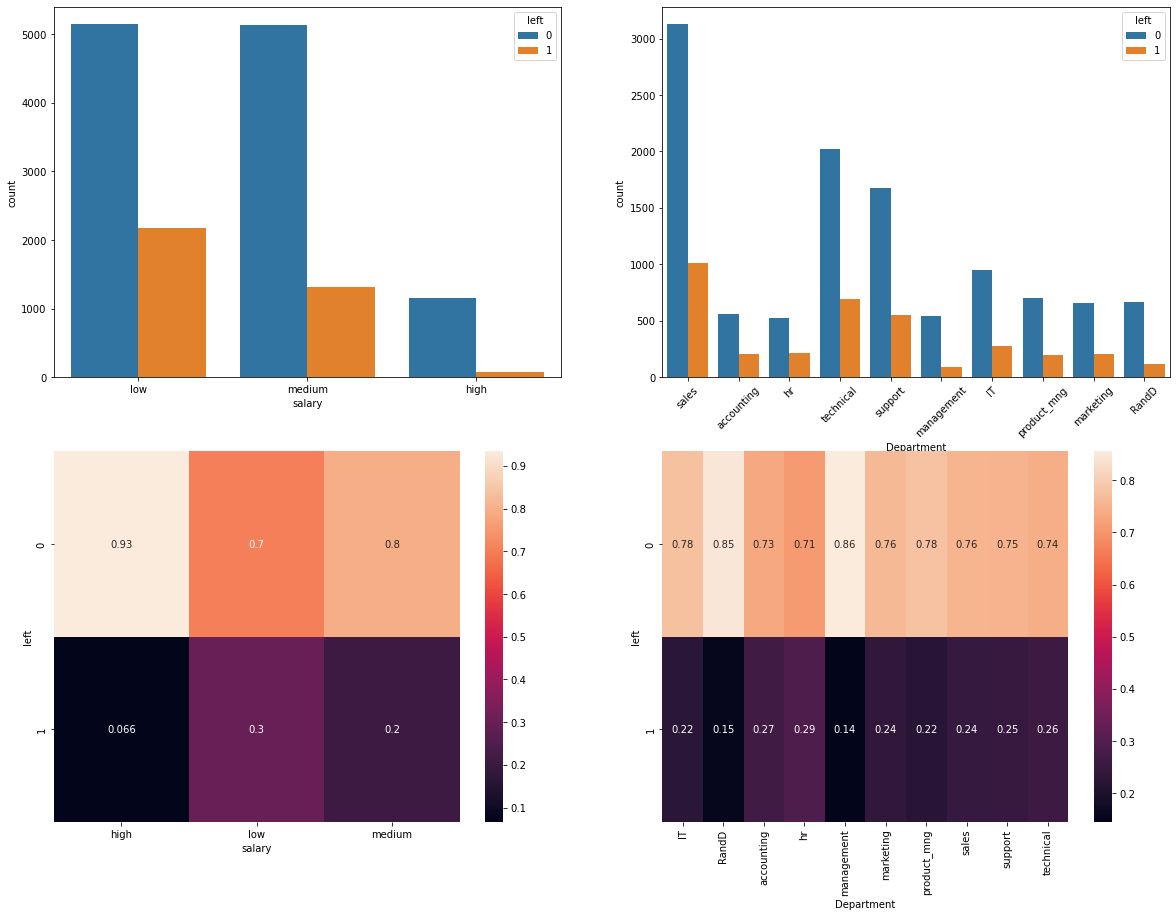

In [199]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sb.countplot(data=df,x="salary",hue="left")
plt.subplot(222)
sb.countplot(data=df,x="Department",hue="left")
plt.xticks(rotation=45)
plt.subplot(223)
sb.heatmap(pd.crosstab(index=df["left"],columns=df["salary"],normalize='columns'),annot=True)
plt.subplot(224)
sb.heatmap(pd.crosstab(index=df["left"],columns=df["Department"],normalize='columns'),annot=True)
plt.show()

In [200]:
df.pivot_table(index="left",values="salary_num",aggfunc=["mean","median"])

,mean,median
,salary_num,salary_num
left,,
0,32714.868481,23714
1,21670.828619,16548


- out of resigned employees Low salaried employees are more in numbers
- out of resigned employees sales department employees are more in numers
- high salaries ones have lower attrition rate
- RandD and management have lower attrition rate


### Task2

- Data Preprocessing

In [201]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_num               0
dtype: int64

In [202]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
salary_num                 int64
dtype: object

In [203]:
df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [204]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [205]:
#there are no null values or noise in the dataset

- Label Encoding to convert categorical to numerical

In [206]:
l=df.select_dtypes(include="object")
for i in l:
    df[i]=df[i].astype('category')
for i in l:
    df[i]=LabelEncoder().fit_transform(df[i])

- Dropping left and salary features from dataset which are irrelevant for our modelling

In [207]:
df.drop(["salary","left"],axis=1,inplace=True)

- Correlation Matrix

<AxesSubplot:>

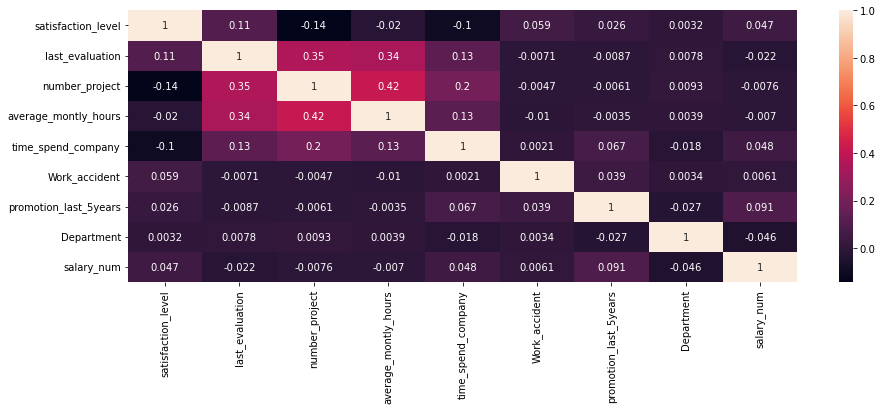

In [208]:
#Correlation matrix
plt.figure(figsize=(15,5))
sb.heatmap(df.corr(),annot=True)

Salary_num is our target variable.With respect to that top features are:
- Promotion-last 5 years
- Satisfaction level
- Department
- Time spent in company

- Feature Scaling using Standard Scaler

In [209]:
df1=df.loc[:,df.columns!="salary_num"]
y=df["salary_num"]
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df["salary_num"]=y
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary_num
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,0.393725,4649
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.393725,34126
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.393725,40522
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,0.393725,6916
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,0.393725,10928


In [210]:
#based on correlation matrix slecting only 4 features
x=df[["promotion_last_5years","Department","satisfaction_level","time_spend_company"]]
#x=df.loc[:,df.columns!="salary_num"]

- Train test split 

In [211]:
#train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

### Task3

- Finding best max depth from KFOLD cross validation method which has low RMSE value

In [212]:
kf = KFold(n_splits=10, shuffle=False, random_state=None)
l=[0]*10
for i in range(1,11):
    score=cross_val_score(DecisionTreeRegressor(max_depth=i,random_state=40),x,y,cv=kf,scoring="neg_mean_squared_error")
    s=score.mean()
    rmse=np.sqrt(-s)
    l[i-1]=rmse
opt=l.index(min(l))+1
print("Optimal max Depth=",opt)

Optimal max Depth= 8


- Regression Tree Model using optimal max_depth

In [213]:
model=DecisionTreeRegressor(max_depth=opt,min_samples_split=5,min_samples_leaf=10).fit(x_train,y_train)

- Train R^2

In [214]:
model.score(x_train,y_train)

0.08910944180622704

- Test R^2

In [215]:
model.score(x_test,y_test)

0.050949006326337476

- y predicted for test data

In [216]:
y_pred=model.predict(x_test)
y_df=pd.DataFrame({"actual":y_test,"predicted":y_pred})
y_df.head()

,actual,predicted
2463,7085,28030.907738
6579,16076,30405.795345
9578,47833,30405.795345
8174,15716,30286.765677
20,12356,18814.256250


### Task4

- Evaluation Metrics for Regressor:Mean Square Error,Mean Absolute Error,Root Mean Squared Error 

In [217]:
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
MSE,MAE,RMSE

(1046248530.6005586, 20498.432529256264, 32345.765265341284)

- We can see here that errors are extremely high and it indicates that our model is worst model
- It was clearly visible from the correlation matrix that none of the features were correlated with target variable salary_num
- Due to that we got a poor model here with R^2 under 10%